In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from arch import arch_model
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from scipy.stats import norm

# Garch(1,1) con distintos parametros y con distribución t de 3 a 5 grados de libertad

In [46]:
#hiperarametros

p= 1
q =1

#parametros
mu =0
omega = 0.4
alpha = [0.2,0.5,0.7]
beta = [0.7,0.4,0.2]
nu = [3,4,5]

In [47]:
n_datos = 500
sim_mod = arch_model(None, p=p, o=0, q=q,dist="StudentsT")
datos_simulados = []
for i in range(len(alpha)):
    for j in range(len(nu)):
        params = {"mu":mu,"omega": omega,"alpha[1]":alpha[i],"beta[1]":beta[i],"nu":nu[j]}
        param = pd.Series(params)
        sim_data = sim_mod.simulate(param, n_datos)
        datos_simulados.append(sim_data["data"])


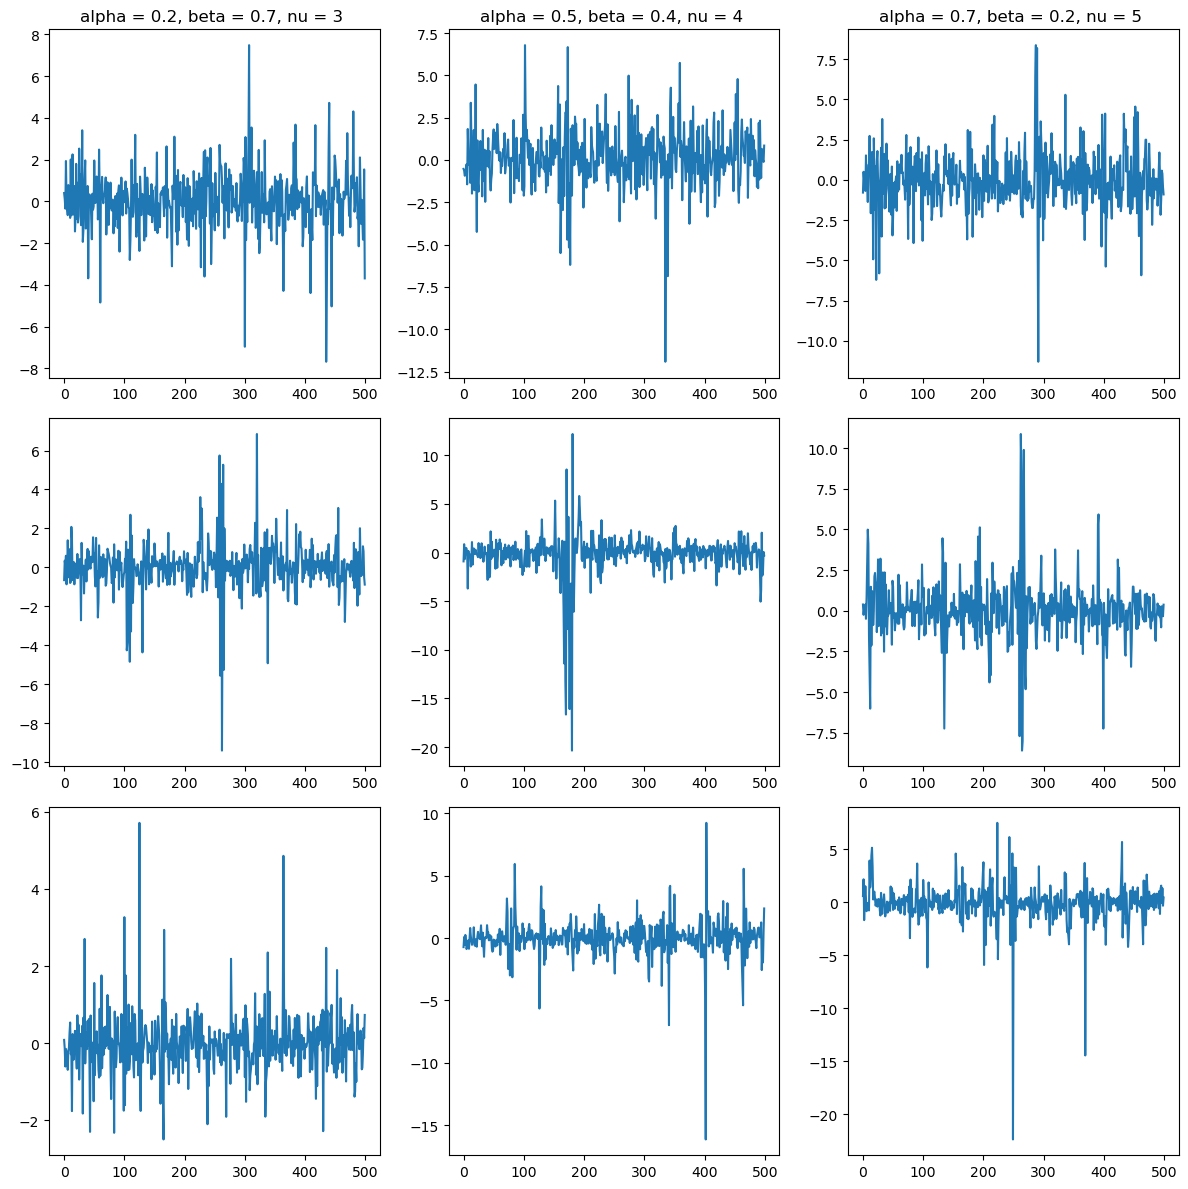

In [51]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()
i=0
for ax in axes:
    ax.plot(datos_simulados[i]) 
    if i ==0 or i==1 or i==2:
        ax.set_title(f'alpha = {alpha[i]}, beta = {beta[i]}, nu = {nu[i]} ')  
        
        
        
        
    i = i+1
        

        
        
plt.tight_layout()
plt.show()